# Multiple Layer Perceptron (MLP) for Regression.

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.models import Sequential

In [15]:
# Load the Diamond Dataset using Seaborn
df = sns.load_dataset("diamonds")
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [16]:
# Let's check for missing values in our dataset
print(df.isnull().sum())


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [17]:
# Let's Enocde the Caregorical Features and store to Decode them later
label_encoders = {}
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le
# Let's Scale the Numerical Features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
   

In [18]:
# Select Features and Target
X = df.drop('price', axis=1)
y = df['price']
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Building the MLP Model
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
# Compile the Model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                loss=losses.MeanSquaredError(),
                metrics=[metrics.MeanAbsoluteError()])
# Training the Model               
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
1349/1349 [==============================] - 6s 4ms/step - loss: 11220587.0000 - mean_absolute_error: 2026.0836 - val_loss: 2371460.0000 - val_mean_absolute_error: 1036.8834
Epoch 2/100
1349/1349 [==============================] - 5s 3ms/step - loss: 1986283.0000 - mean_absolute_error: 856.2222 - val_loss: 1464571.1250 - val_mean_absolute_error: 736.6831
Epoch 3/100
1349/1349 [==============================] - 5s 3ms/step - loss: 1653317.1250 - mean_absolute_error: 736.4575 - val_loss: 1371471.8750 - val_mean_absolute_error: 708.7841
Epoch 4/100
1349/1349 [==============================] - 5s 3ms/step - loss: 1590624.8750 - mean_absolute_error: 711.9502 - val_loss: 1333914.2500 - val_mean_absolute_error: 688.9454
Epoch 5/100
1349/1349 [==============================] - 5s 3ms/step - loss: 1551401.1250 - mean_absolute_error: 695.2819 - val_loss: 1311699.2500 - val_mean_absolute_error: 680.5809
Epoch 6/100
1349/1349 [==============================] - 4s 3ms/step - loss: 15229

In [20]:
# Evaluating the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE: {test_mae:.2f}')
# Display Some Actual vs Predicted Values
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison_df.head(10))
# Also display the first 10 wrong predictions
comparison_df['Error'] = np.abs(comparison_df['Actual'] - comparison_df['Predicted'])
wrong_predictions = comparison_df.sort_values(by='Error', ascending=False).head(10)
print(wrong_predictions)

Test MAE: 487.97
338/338 [==============================] - 0s 1ms/step
       Actual     Predicted
1388      559    442.355499
50052    2201   2620.404297
41645    1238   1201.710815
42377    1304   1412.105591
17244    6901  11531.744141
1608     3011   4266.166016
46398    1765   1399.636108
45493    1679   1762.697632
49385    2102   2311.620605
10460    4789   5506.116699
       Actual     Predicted        Error
27196   17499   9221.428711  8277.571289
27673   18691  11074.120117  7616.879883
26407   15928   8405.550781  7522.449219
26491   16087   9033.217773  7053.782227
26198   15575   8816.178711  6758.821289
26311   15813   9401.526367  6411.473633
26237   15671   9432.041992  6238.958008
27232   17598  11467.502930  6130.497070
26152   15464   9545.505859  5918.494141
26591   16311  10716.754883  5594.245117


Epoch 1/100
1349/1349 [==============================] - 5s 4ms/step - loss: 790164.3750 - mean_absolute_error: 492.0890 - val_loss: 752633.0000 - val_mean_absolute_error: 482.2721
Epoch 2/100
1349/1349 [==============================] - 5s 4ms/step - loss: 789875.4375 - mean_absolute_error: 493.6133 - val_loss: 768014.0000 - val_mean_absolute_error: 495.7268
Epoch 3/100
1349/1349 [==============================] - 5s 3ms/step - loss: 788147.6875 - mean_absolute_error: 491.9658 - val_loss: 746170.5000 - val_mean_absolute_error: 481.4846
Epoch 4/100
1349/1349 [==============================] - 5s 3ms/step - loss: 783737.1875 - mean_absolute_error: 491.3812 - val_loss: 750034.5000 - val_mean_absolute_error: 481.6444
Epoch 5/100
1349/1349 [==============================] - 5s 4ms/step - loss: 781241.1875 - mean_absolute_error: 490.7247 - val_loss: 745141.9375 - val_mean_absolute_error: 482.0022
Epoch 6/100
1349/1349 [==============================] - 5s 4ms/step - loss: 781371.3750 - mean

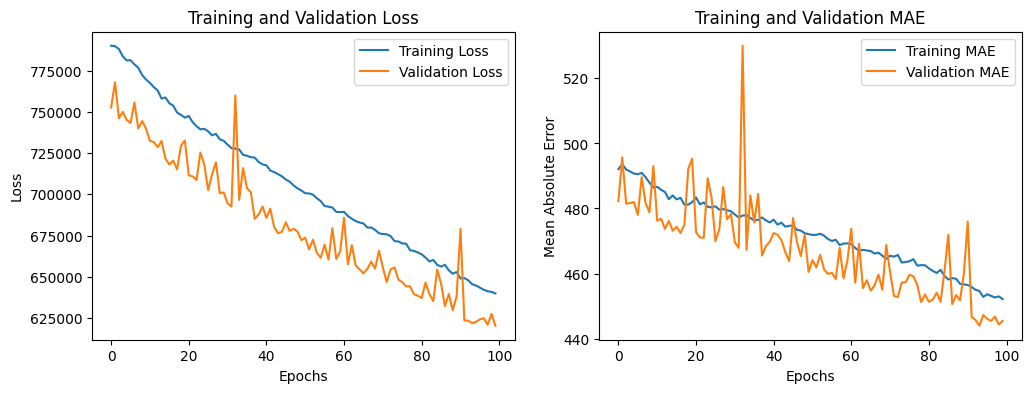

In [21]:
# Plotting the Training and Validation Loss and MAE
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()